# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Projeto

### Dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set1")
df = pd.read_csv("./datasets/LED.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Limpando e corrigindo colunas

In [75]:
oldcols = list(df.columns)
newcols = []
for col in oldcols:
    newcols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = newcols
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

### Lidar com valores inválidos/suspeitos

In [76]:
df.describe().iloc[0:,1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


min infant_deaths=0; 
min adult_mortality=1; 
min under-five_deaths=0;
max bmi=87.3;

In [77]:
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)
#adult_mortality
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1) #bmi

### Nulos

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

In [79]:
colunas = df.columns # Lista com os títulos das colunas.
colunas_so_com_numericos = colunas[3:23] # Deixei apenas valores numéricos(retirei as strings).
colunas_so_com_numericos

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [80]:
lista_medias = df.mean(axis=0).to_list() # Passando as médias das colunas para uma lista.
lista_medias_numericos = lista_medias[1:23] # Retirei a médias das colunas dos anos, através de um corte na lista.

In [81]:
lista_medianas = df.median(axis=0).to_list() # Passando as medianas das colunas para uma lista.
lista_medianas_numericos = lista_medianas[1:23] # Retirando a mediana da coluna dos anos, novamente.

In [82]:
lista_variancias = df.var(axis=0).to_list() # Passando a variância das colunas para uma lista. 
lista_variancias_numericos = lista_variancias[1:23] # Retirando a variância da coluna dos anos.

In [83]:
lista_desvio_padrao = df.std(axis=0).to_list() # Passando o desvio padrão das colunas para uma lista.
lista_desvio_padrao_numericos = lista_desvio_padrao[1:23] # Retirando o desvio padrão da coluna dos anos.

### Médias de cada uma das colunas em um dicionário

In [84]:
for i in range(0, len(lista_medias_numericos)):
    medias_dict = [{"Coluna": colunas_so_com_numericos[i], "Média": lista_medias_numericos[i]}]
    print(medias_dict)

[{'Coluna': 'life_expectancy', 'Média': 69.22493169398912}]
[{'Coluna': 'adult_mortality', 'Média': 164.79644808743168}]
[{'Coluna': 'infant_deaths', 'Média': 42.59952153110048}]
[{'Coluna': 'alcohol', 'Média': 4.6028607871720375}]
[{'Coluna': 'percentage_expenditure', 'Média': 738.2512954533823}]
[{'Coluna': 'hepatitis_b', 'Média': 80.94046121593291}]
[{'Coluna': 'measles', 'Média': 2419.5922396187884}]
[{'Coluna': 'bmi', 'Média': 38.32124655647373}]
[{'Coluna': 'under-five_deaths', 'Média': 57.362285183464934}]
[{'Coluna': 'polio', 'Média': 82.55018842069202}]
[{'Coluna': 'total_expenditure', 'Média': 5.9381895280235915}]
[{'Coluna': 'diphtheria', 'Média': 82.32408359027065}]
[{'Coluna': 'hiv/aids', 'Média': 1.7421034717494939}]
[{'Coluna': 'gdp', 'Média': 7483.158469138481}]
[{'Coluna': 'population', 'Média': 12753375.120052498}]
[{'Coluna': 'thinness_10-19_years', 'Média': 4.8397038567493205}]
[{'Coluna': 'thinness_5-9_years', 'Média': 4.870316804407711}]
[{'Coluna': 'income_compos

### Medianas de cada uma das colunas em um dicionário

In [85]:
for i in range(0, len(lista_medianas_numericos)):
    mediana_dict=[{"Coluna": colunas_so_com_numericos[i], "Mediana": lista_medianas_numericos[i]}]
    print(mediana_dict)

[{'Coluna': 'life_expectancy', 'Mediana': 72.1}]
[{'Coluna': 'adult_mortality', 'Mediana': 144.0}]
[{'Coluna': 'infant_deaths', 'Mediana': 9.0}]
[{'Coluna': 'alcohol', 'Mediana': 3.755}]
[{'Coluna': 'percentage_expenditure', 'Mediana': 64.912906045}]
[{'Coluna': 'hepatitis_b', 'Mediana': 92.0}]
[{'Coluna': 'measles', 'Mediana': 17.0}]
[{'Coluna': 'bmi', 'Mediana': 43.5}]
[{'Coluna': 'under-five_deaths', 'Mediana': 11.0}]
[{'Coluna': 'polio', 'Mediana': 93.0}]
[{'Coluna': 'total_expenditure', 'Mediana': 5.755}]
[{'Coluna': 'diphtheria', 'Mediana': 93.0}]
[{'Coluna': 'hiv/aids', 'Mediana': 0.1}]
[{'Coluna': 'gdp', 'Mediana': 1766.947595}]
[{'Coluna': 'population', 'Mediana': 1386542.0}]
[{'Coluna': 'thinness_10-19_years', 'Mediana': 3.3}]
[{'Coluna': 'thinness_5-9_years', 'Mediana': 3.3}]
[{'Coluna': 'income_composition_of_resources', 'Mediana': 0.677}]
[{'Coluna': 'schooling', 'Mediana': 12.3}]


### Variância de cada uma das colunas em um dicionário

In [86]:
for i in range(0, len(lista_variancias_numericos)):
    variancia_dict=[{"Coluna": colunas_so_com_numericos[i], "Variância": lista_variancias_numericos[i]}]
    print(variancia_dict)

[{'Coluna': 'life_expectancy', 'Variância': 90.70405192563634}]
[{'Coluna': 'adult_mortality', 'Variância': 15448.5209029929}]
[{'Coluna': 'infant_deaths', 'Variância': 19027.835231939487}]
[{'Coluna': 'alcohol', 'Variância': 16.422048356843053}]
[{'Coluna': 'percentage_expenditure', 'Variância': 3951805.4827215625}]
[{'Coluna': 'hepatitis_b', 'Variância': 628.5056818341719}]
[{'Coluna': 'measles', 'Variância': 131498338.34235595}]
[{'Coluna': 'bmi', 'Variância': 401.7632790518308}]
[{'Coluna': 'under-five_deaths', 'Variância': 34253.57036131864}]
[{'Coluna': 'polio', 'Variância': 548.8733370104052}]
[{'Coluna': 'total_expenditure', 'Variância': 6.2416011842798165}]
[{'Coluna': 'diphtheria', 'Variância': 562.4919180684007}]
[{'Coluna': 'hiv/aids', 'Variância': 25.783895744141596}]
[{'Coluna': 'gdp', 'Variância': 203637733.03554288}]
[{'Coluna': 'population', 'Variância': 3722475920353729.0}]
[{'Coluna': 'thinness_10-19_years', 'Variância': 19.538123370760047}]
[{'Coluna': 'thinness_5-9

In [87]:
for i in range(0, len(lista_desvio_padrao_numericos)):
    desvio_padrao_dict=[{"Coluna": colunas_so_com_numericos[i], "Desvio padrão": lista_desvio_padrao_numericos[i]}]
    print(desvio_padrao_dict)

[{'Coluna': 'life_expectancy', 'Desvio padrão': 9.523867487824278}]
[{'Coluna': 'adult_mortality', 'Desvio padrão': 124.29207900342202}]
[{'Coluna': 'infant_deaths', 'Desvio padrão': 137.94141956620385}]
[{'Coluna': 'alcohol', 'Desvio padrão': 4.052412658755652}]
[{'Coluna': 'percentage_expenditure', 'Desvio padrão': 1987.9148580161984}]
[{'Coluna': 'hepatitis_b', 'Desvio padrão': 25.070015593018123}]
[{'Coluna': 'measles', 'Desvio padrão': 11467.272489234567}]
[{'Coluna': 'bmi', 'Desvio padrão': 20.044033502562073}]
[{'Coluna': 'under-five_deaths', 'Desvio padrão': 185.0772010846248}]
[{'Coluna': 'polio', 'Desvio padrão': 23.42804594946845}]
[{'Coluna': 'total_expenditure', 'Desvio padrão': 2.4983196721556302}]
[{'Coluna': 'diphtheria', 'Desvio padrão': 23.716912068572515}]
[{'Coluna': 'hiv/aids', 'Desvio padrão': 5.077784531086524}]
[{'Coluna': 'gdp', 'Desvio padrão': 14270.16934151599}]
[{'Coluna': 'population', 'Desvio padrão': 61012096.50842798}]
[{'Coluna': 'thinness_10-19_years'

### Boxplots e describes de variáveis importantes

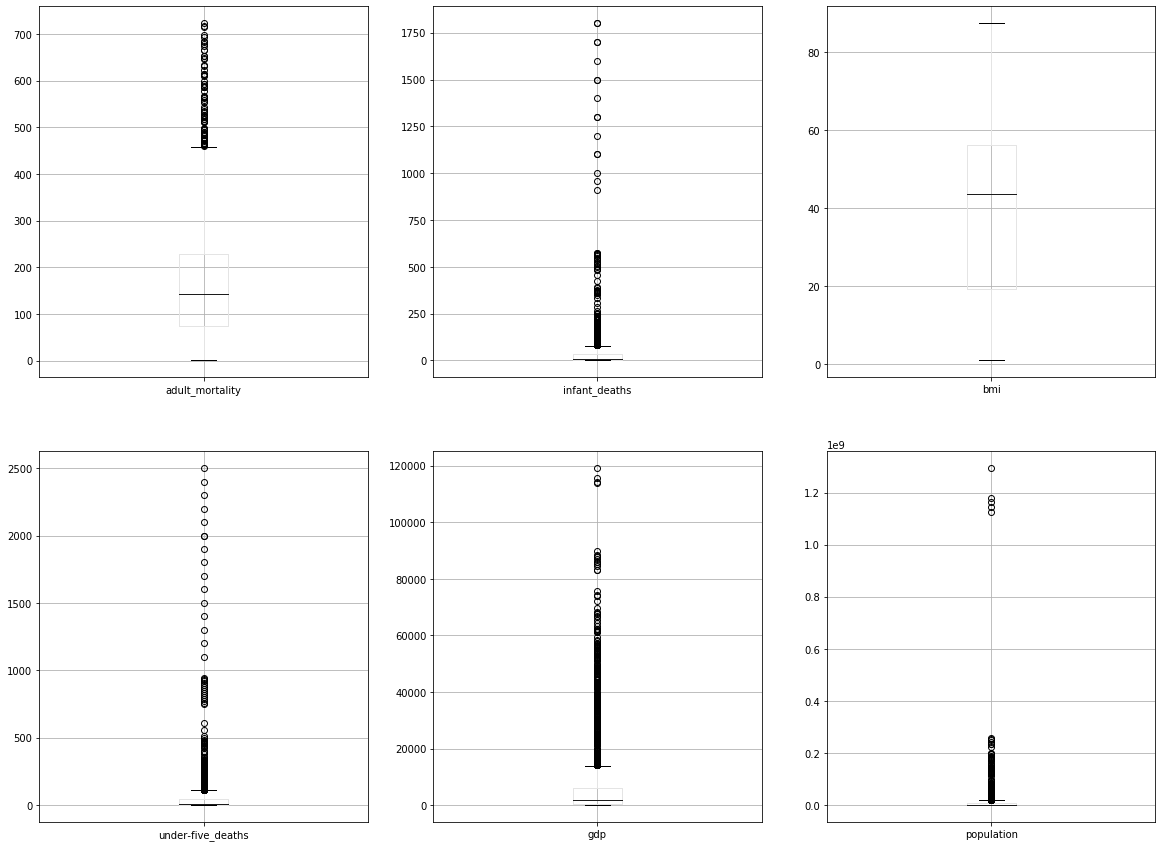

In [88]:
plt.figure(figsize=(20,15))

for i, col in enumerate(['adult_mortality','infant_deaths','bmi','under-five_deaths','gdp','population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

### UTILIZAÇÃO DO DESCRIBE PARA VISUALIZAÇÃO DOS QUARTIS, BEM COMO DA MAIOR CONCENTRAÇÃO DE DADOS NO DATASET

### Mortalidade adulta

In [89]:
df['adult_mortality'].describe() 

count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: adult_mortality, dtype: float64

### Mortalidade infantil

In [90]:
df['infant_deaths'].describe()

count    2090.000000
mean       42.599522
std       137.941420
min         1.000000
25%         2.000000
50%         9.000000
75%        33.000000
max      1800.000000
Name: infant_deaths, dtype: float64

### Índice de massa corporal (IMC)

In [91]:
df['bmi'].describe()

count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name: bmi, dtype: float64

### Morte abaixo de 5 anos de idade

In [92]:
df['under-five_deaths'].describe()

count    2153.000000
mean       57.362285
std       185.077201
min         1.000000
25%         3.000000
50%        11.000000
75%        46.000000
max      2500.000000
Name: under-five_deaths, dtype: float64

### PIB per capita (Em dólares americanos)

In [93]:
df['gdp'].describe()

count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: gdp, dtype: float64

### População dos países

In [94]:
df['population'].describe()

count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: population, dtype: float64

### Dados anuais, por média global

In [96]:
medias_ao_longo_dos_anos = df.groupby("year").mean().reset_index()
medias_ao_longo_dos_anos

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2000,66.750273,181.475410,50.888889,4.570714,473.850781,74.035294,4663.792350,34.424862,71.246377,76.277778,5.585475,73.627778,2.530055,4708.515191,9.440444e+06,5.147514,5.244751,0.512214,10.512717
1,2001,67.128962,175.169399,49.918519,4.555659,516.625910,73.957895,4640.262295,36.135912,69.007246,77.950000,5.599609,76.661111,2.573770,4854.527638,1.007057e+07,4.957459,5.055249,0.563012,10.950289
2,2002,67.351366,171.437158,48.237037,4.660934,476.794487,76.522124,3204.754098,37.110497,67.189781,79.679558,5.687989,78.883978,2.573770,4599.303043,6.625328e+06,5.166298,5.118232,0.568006,11.140462
3,2003,67.433333,169.131148,48.348485,4.690495,494.706547,74.099237,3708.792350,36.440331,64.897810,80.353591,5.827444,78.867403,2.546995,4774.835677,1.015988e+07,4.924309,5.023757,0.572399,11.308092
4,2004,67.646448,186.262295,46.293233,4.753681,772.336156,77.985507,2805.497268,36.572376,63.367647,80.165746,5.859111,79.823204,2.478689,7055.889709,1.685299e+07,4.936464,5.029282,0.584168,11.547399
5,2005,68.209290,167.633880,44.871212,4.846409,823.318110,80.911565,3200.551913,35.607735,60.963235,80.972376,5.920722,81.674033,2.345902,7249.787557,1.828185e+07,5.099448,5.195580,0.596445,11.675723
6,2006,68.667760,170.404372,43.766917,4.917692,828.776319,81.894040,2063.224044,37.534254,60.014815,84.527473,5.699000,82.236264,2.169399,7347.033143,1.536564e+07,5.115470,5.157459,0.632312,11.917919
7,2007,69.036066,159.808743,42.120301,5.014066,954.458468,81.584906,1557.540984,36.977901,58.358209,84.802198,5.631056,84.318681,1.992896,8537.243114,1.853530e+07,5.034807,4.976243,0.639000,12.038150
8,2008,69.427869,174.519126,40.684211,5.007088,1095.802669,83.644172,1523.229508,38.225414,56.432836,85.565934,5.723056,84.857143,1.797268,10604.040364,9.487742e+06,4.907182,4.941436,0.645717,12.176301
9,2009,69.938251,163.393443,41.077519,4.889231,719.827424,84.277108,1522.606557,39.583425,54.313433,85.329670,6.528389,85.060440,1.538798,7060.615022,9.132068e+06,4.786740,4.718232,0.651434,12.310983


### GRÁFICO DE BARRA
### O gráfico abaixo mostra a diminuição, ao longo dos anos, da média de mortes por HIV/AIDS a cada 1000 crianças entre 0-4 anos.

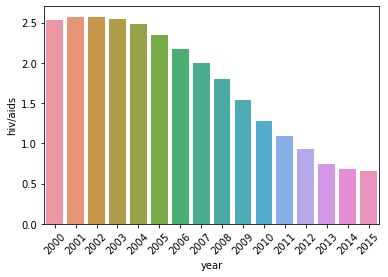

In [107]:
grafico_barras = sns.barplot(data=medias_ao_longo_dos_anos, y="hiv/aids", x="year")
plt.xticks(rotation=45)
plt.show()

### GRÁFICO DE DISPERSÃO

### O gráfico abaixo mostra a forte correlação entre a média de anos que as pessoas passam na escola e o IDH (0-1) dos países

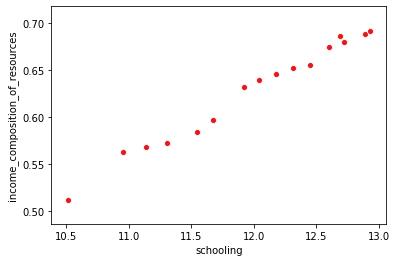

In [111]:
sns.scatterplot(data=medias_ao_longo_dos_anos, y="income_composition_of_resources", x="schooling")

### Grafico de linha

### É possível observar como a expectativa de vida se alterou globalmente ao longo dos anos

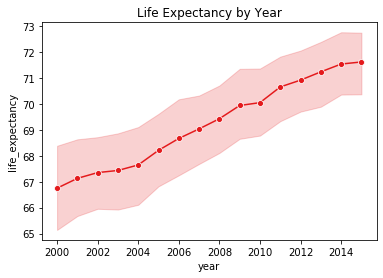

In [112]:
sns.lineplot(x='year', y='life_expectancy', data=df, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

### Mapa de correlações

### Mapa que mostra o quão relacionadas estão duas variáveis ( Negativos: para variáveis anticorrelacionadas, 0 para nenhuma relação e 1 para variáveis totalmente relacionadas)

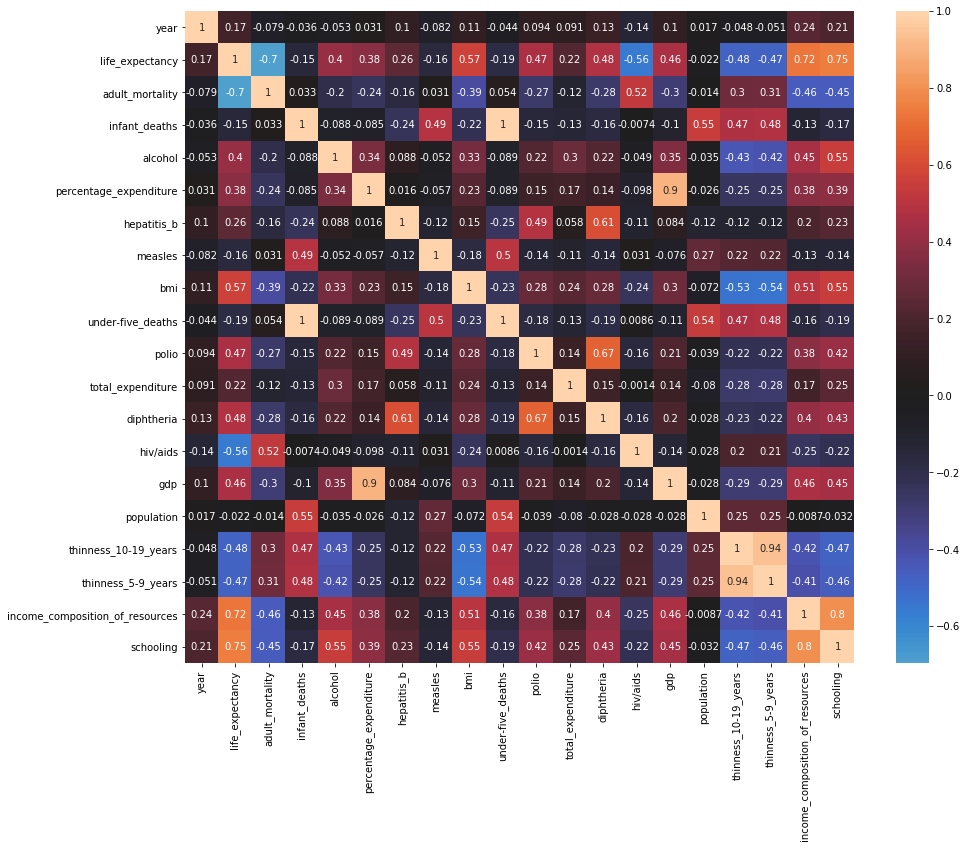

In [110]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),center=0,annot=True)

### Histogramas utilizando dados das doenças

### Percebe-se que a cobertura de imunização, em porcentagem, é alta (mais de 1.600 vezes essa porcentagem foi entre 90 e 100% nos países do Dataset

(array([1.720e+02, 1.000e+00, 1.000e+01, 2.600e+01, 7.000e+01, 8.500e+01,
        1.510e+02, 2.710e+02, 4.470e+02, 1.686e+03]),
 array([ 3. , 12.6, 22.2, 31.8, 41.4, 51. , 60.6, 70.2, 79.8, 89.4, 99. ]),
 <a list of 10 Patch objects>)

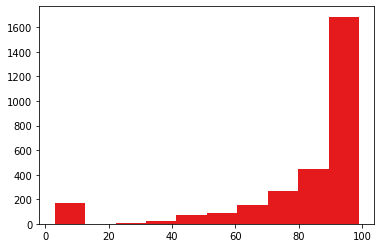

In [116]:
plt.hist(df['polio'])

### Na hepatite C, essa cobertura também é alta, com mais de 1.200 vezes a porcentagem entre 90 e 100%, novamente.

(array([ 159.,   16.,   22.,   21.,   56.,   48.,  142.,  202.,  403.,
        1316.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

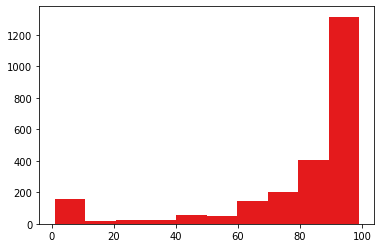

In [120]:
plt.hist(df['hepatitis_b'])